In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [6]:
img_height,img_width=(224,224)
batch_size=3
train_data_dir=r"D:\MTP PROJECT\OUTPUT\train"
valid_data_dir=r"D:\MTP PROJECT\OUTPUT\val"
test_data_dir=r"D:\MTP PROJECT\OUTPUT\test"

In [7]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.4)

train_generator=train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_height,img_width),
      batch_size=batch_size,
      class_mode="categorical",
      subset="training")   #set as training data

train_generator=train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_height,img_width),
      batch_size=batch_size,
      class_mode="categorical",
      subset="validation")   #set as validation data



Found 141 images belonging to 3 classes.
Found 93 images belonging to 3 classes.


In [8]:
test_generator=train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_height,img_width),
      batch_size=1,
      class_mode="categorical",
      subset="validation")   #set as validation data


Found 93 images belonging to 3 classes.


In [9]:
x,y=test_generator.next()
x.shape

(1, 224, 224, 3)

In [10]:
train_generator.num_classes

3

In [12]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [13]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [14]:
for layer in vgg.layers:
    layer.trainable=False

In [16]:
x=Flatten()(vgg.output)
prediction=Dense(train_generator.num_classes,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
31/31 [==============================] - 30s 852ms/step - loss: 1.1045 - accuracy: 0.7097
Epoch 2/10
31/31 [==============================] - 32s 1s/step - loss: 0.1056 - accuracy: 0.9892
Epoch 3/10
31/31 [==============================] - 34s 1s/step - loss: 0.0628 - accuracy: 1.0000
Epoch 4/10
31/31 [==============================] - 33s 1s/step - loss: 0.0120 - accuracy: 1.0000
Epoch 5/10
31/31 [==============================] - 28s 895ms/step - loss: 0.0639 - accuracy: 0.9785
Epoch 6/10
31/31 [==============================] - 32s 1s/step - loss: 0.0296 - accuracy: 1.0000
Epoch 7/10
31/31 [==============================] - 39s 1s/step - loss: 0.0416 - accuracy: 0.9892
Epoch 8/10
31/31 [==============================] - 49s 2s/step - loss: 0.0468 - accuracy: 1.0000
Epoch 9/10
31/31 [==============================] - 50s 2s/step - loss: 7.5470e-04 - accuracy: 1.0000
Epoch 10/10
31/31 [==============================] - 49s 2s/step - loss: 8.5628e-04 - accuracy: 1.0000


Text(0.5, 0, 'epochs')

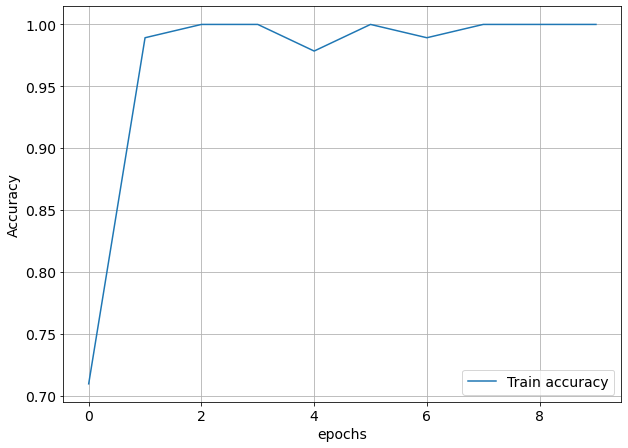

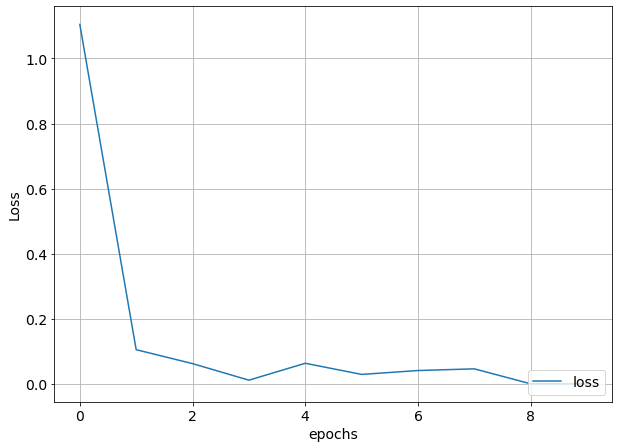

In [18]:
history=model.fit(train_generator,
         epochs=10)
accuracy = history.history['accuracy']
loss=history.history['loss']
# loss = history.history["categorical_crossentropy"]

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Train accuracy')
# plt.plot(loss, label='loss')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.xlabel('epochs')

Epoch 1/10
93/93 [==============================] - 60s 614ms/step - loss: 1.3233e-04 - accuracy: 1.0000
Epoch 2/10
93/93 [==============================] - 51s 547ms/step - loss: 1.2248e-05 - accuracy: 1.0000
Epoch 3/10
93/93 [==============================] - 50s 533ms/step - loss: 8.0708e-04 - accuracy: 1.0000
Epoch 4/10
93/93 [==============================] - 48s 512ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 5/10
93/93 [==============================] - 52s 554ms/step - loss: 0.1956 - accuracy: 0.9892
Epoch 6/10
93/93 [==============================] - 47s 504ms/step - loss: 0.1659 - accuracy: 0.9892
Epoch 7/10
93/93 [==============================] - 33s 353ms/step - loss: 0.0349 - accuracy: 1.0000
Epoch 8/10
93/93 [==============================] - 33s 351ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 9/10
93/93 [==============================] - 29s 309ms/step - loss: 0.0660 - accuracy: 1.0000
Epoch 10/10
93/93 [==============================] - 30s 318ms/step - loss: 0.2

Text(0.5, 0, 'epochs')

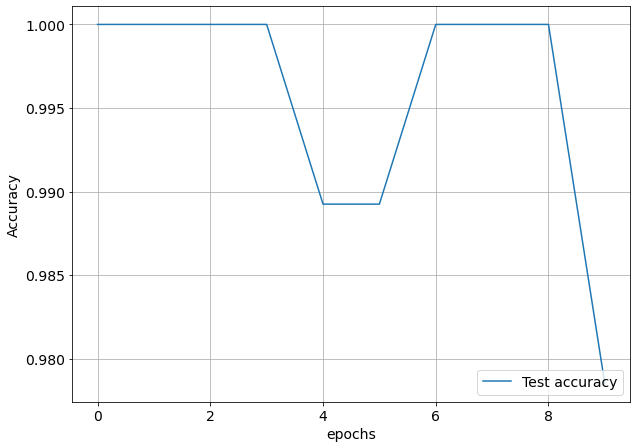

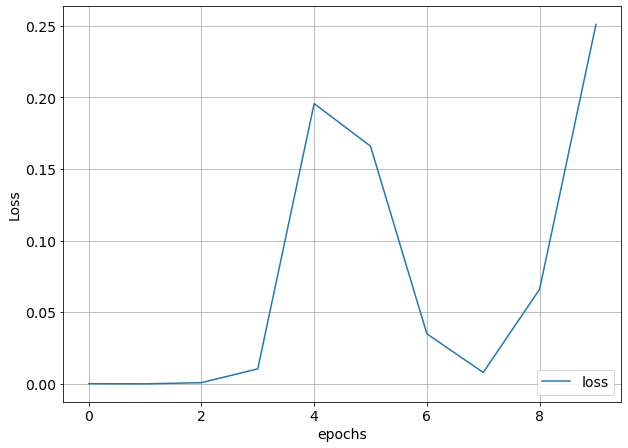

In [19]:
history=model.fit(test_generator,
         epochs=10)
accuracy = history.history['accuracy']
loss=history.history['loss']
# loss = history.history["categorical_crossentropy"]

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Test accuracy')
# plt.plot(loss, label='loss')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epochs')

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.xlabel('epochs')

In [20]:
model.save(r"D:\lab images\saved_model\VGG16.h5")

In [21]:
test_loss,test_acc=model.evaluate(test_generator,verbose=2)

print("\nTest accuracy:",test_acc)  #accuracy of test dataset

93/93 - 30s - loss: 1.9406e-06 - accuracy: 1.0000 - 30s/epoch - 325ms/step

Test accuracy: 1.0


1/1 [==============================] - 0s 284ms/step


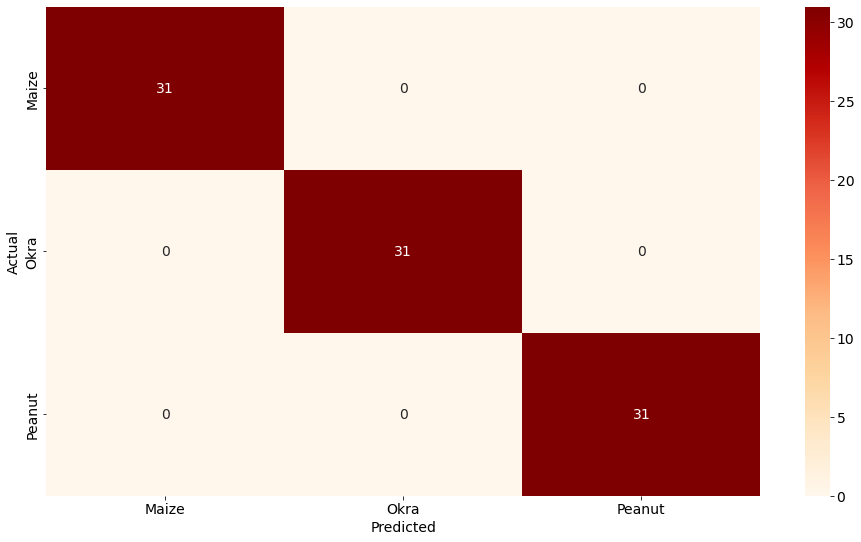

test accuracy:Predicted
Maize     300.0
Okra      300.0
Peanut    300.0
dtype: float64


In [23]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model=tf.keras.models.load_model(r"D:\lab images\saved_model\VGG16.h5")
filenames=test_generator.filenames
nb_samples=len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test=test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
    
predicted_class=[list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=["predicted_class","actual_class"])
confusion_matrix=pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actual"],colnames=["Predicted"])

sn.heatmap(confusion_matrix,cmap="OrRd",annot=True,fmt="d")
plt.show()
print("test accuracy:{}".format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum()*100)))

# TO CHANGE THE COLOR OF CONFUSION MATRIX

In [ ]:
# # cmap = [Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, 
# BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, 
# Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
# Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, 
# PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, 
# RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, 
# Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, 
# YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
# autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, 
# cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, 
# cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r,
# gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, 
# gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, 
# gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, 
# inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r,
# ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
# rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, 
# tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
# viridis, viridis_r, vlag, vlag_r, winter, winter_r]

In [24]:
print(predicted_class)

['Maize', 'Peanut', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Peanut', 'Okra', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Peanut', 'Peanut', 'Maize', 'Maize', 'Okra', 'Okra', 'Okra', 'Okra', 'Maize', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Peanut', 'Okra', 'Peanut', 'Maize', 'Maize', 'Peanut', 'Peanut', 'Maize', 'Maize', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Peanut', 'Okra', 'Peanut', 'Okra', 'Maize', 'Maize', 'Okra', 'Okra', 'Maize', 'Peanut', 'Peanut', 'Maize', 'Okra', 'Okra', 'Maize', 'Peanut', 'Peanut', 'Okra', 'Okra', 'Maize', 'Maize', 'Maize', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Maize', 'Maize', 'Peanut', 'Peanut', 'Maize', 'Maize', 'Maize', 'Okra', 'Peanut', 'Peanut', 'Okra', 'Okra', 'Maize', 'Okra', 'Okra', 'Maize', 'Peanut', 'Okra', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Maize', 'Peanut', 'Peanut', 'Okra', 'Maize']


In [25]:
print(actual_class)

['Maize', 'Peanut', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Peanut', 'Okra', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Peanut', 'Peanut', 'Maize', 'Maize', 'Okra', 'Okra', 'Okra', 'Okra', 'Maize', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Peanut', 'Okra', 'Peanut', 'Maize', 'Maize', 'Peanut', 'Peanut', 'Maize', 'Maize', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Peanut', 'Okra', 'Peanut', 'Okra', 'Maize', 'Maize', 'Okra', 'Okra', 'Maize', 'Peanut', 'Peanut', 'Maize', 'Okra', 'Okra', 'Maize', 'Peanut', 'Peanut', 'Okra', 'Okra', 'Maize', 'Maize', 'Maize', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Maize', 'Maize', 'Peanut', 'Peanut', 'Maize', 'Maize', 'Maize', 'Okra', 'Peanut', 'Peanut', 'Okra', 'Okra', 'Maize', 'Okra', 'Okra', 'Maize', 'Peanut', 'Okra', 'Okra', 'Okra', 'Peanut', 'Peanut', 'Maize', 'Peanut', 'Peanut', 'Okra', 'Maize']


In [27]:
import pandas as pd
df = pd.read_csv(r"D:\Maize.txt") # can replace with df = pd.read_table('input.txt') for '\t'
# print(df)
print(df.to_excel(r"D:\MTP PROJECT\EXCEL VALUES IMAGES\output2.xlsx"))

None
